In [1]:
pip install tensorflow-gpu==2.0.0rc

     |████████████████████████████████| 380.5MB 49kB/s 
     |████████████████████████████████| 4.3MB 32.9MB/s 
     |████████████████████████████████| 501kB 40.4MB/s 


In [2]:
pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [4]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [7]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
X_train = X_train/255;
X_test = X_test/255;

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

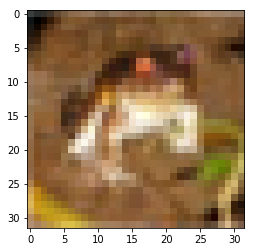

In [12]:
plt.imshow(X_train[0])

Build CNN Model

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding = 'same' , activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding = 'same' , activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2),strides = 2, padding = 'valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [17]:
history = model.fit(X_train,y_train,batch_size=10,epochs=5,verbose=1,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 220s 4ms/sample - loss: 1.4398 - sparse_categorical_accuracy: 0.4794 - val_loss: 1.1471 - val_sparse_categorical_accuracy: 0.5891
Epoch 2/5
50000/50000 [==============================] - 220s 4ms/sample - loss: 1.1324 - sparse_categorical_accuracy: 0.5973 - val_loss: 1.0566 - val_sparse_categorical_accuracy: 0.6213
Epoch 3/5
50000/50000 [==============================] - 222s 4ms/sample - loss: 1.0031 - sparse_categorical_accuracy: 0.6455 - val_loss: 0.9529 - val_sparse_categorical_accuracy: 0.6683
Epoch 4/5
50000/50000 [==============================] - 225s 4ms/sample - loss: 0.9103 - sparse_categorical_accuracy: 0.6765 - val_loss: 0.9351 - val_sparse_categorical_accuracy: 0.6742
Epoch 5/5
50000/50000 [==============================] - 221s 4ms/sample - loss: 0.8413 - sparse_categorical_accuracy: 0.7028 - val_loss: 0.9544 - val_sparse_categorical_accuracy: 0.6698


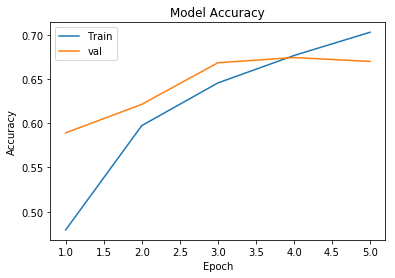

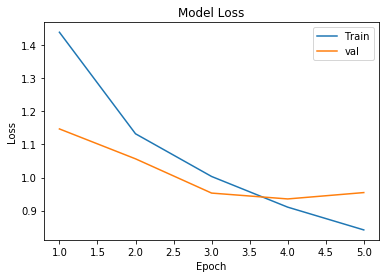

In [24]:
epoch_range = range(1,6)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','val'],loc = 'upper left')
plt.show()
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','val'],loc = 'upper right')
plt.show()

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc8be3b780>)

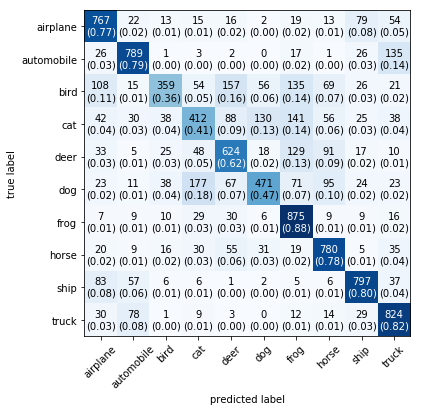

In [26]:

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(mat,figsize = (6,6),class_names = classes,show_normed = True)